In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("synthetic_insurance_data.csv")
df

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,4,1,6,2,2,2,809,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,59,1,Single,0,1-5 years,50,0,Low,0,Full Coverage,...,6,1,4,3,2,9,783,-50,Urban,100
9996,18,0,Married,86,1-5 years,50,0,Medium,0,Full Coverage,...,3,1,6,1,3,6,667,50,Urban,100
9997,29,0,Married,86,<1 year,100,0,Low,0,Full Coverage,...,29,1,3,4,3,3,637,50,Urban,100
9998,47,0,Single,0,<1 year,100,0,Medium,0,Liability-Only,...,8,1,2,4,1,13,676,50,Suburban,50


In [10]:
df.drop_duplicates()
df.shape

(10000, 27)

In [11]:
print(df.isna().sum())

Age                                   0
Is_Senior                             0
Marital_Status                        0
Married_Premium_Discount              0
Prior_Insurance                       0
Prior_Insurance_Premium_Adjustment    0
Claims_Frequency                      0
Claims_Severity                       0
Claims_Adjustment                     0
Policy_Type                           0
Policy_Adjustment                     0
Premium_Amount                        0
Safe_Driver_Discount                  0
Multi_Policy_Discount                 0
Bundling_Discount                     0
Total_Discounts                       0
Source_of_Lead                        0
Time_Since_First_Contact              0
Conversion_Status                     0
Website_Visits                        0
Inquiries                             0
Quotes_Requested                      0
Time_to_Conversion                    0
Credit_Score                          0
Premium_Adjustment_Credit             0


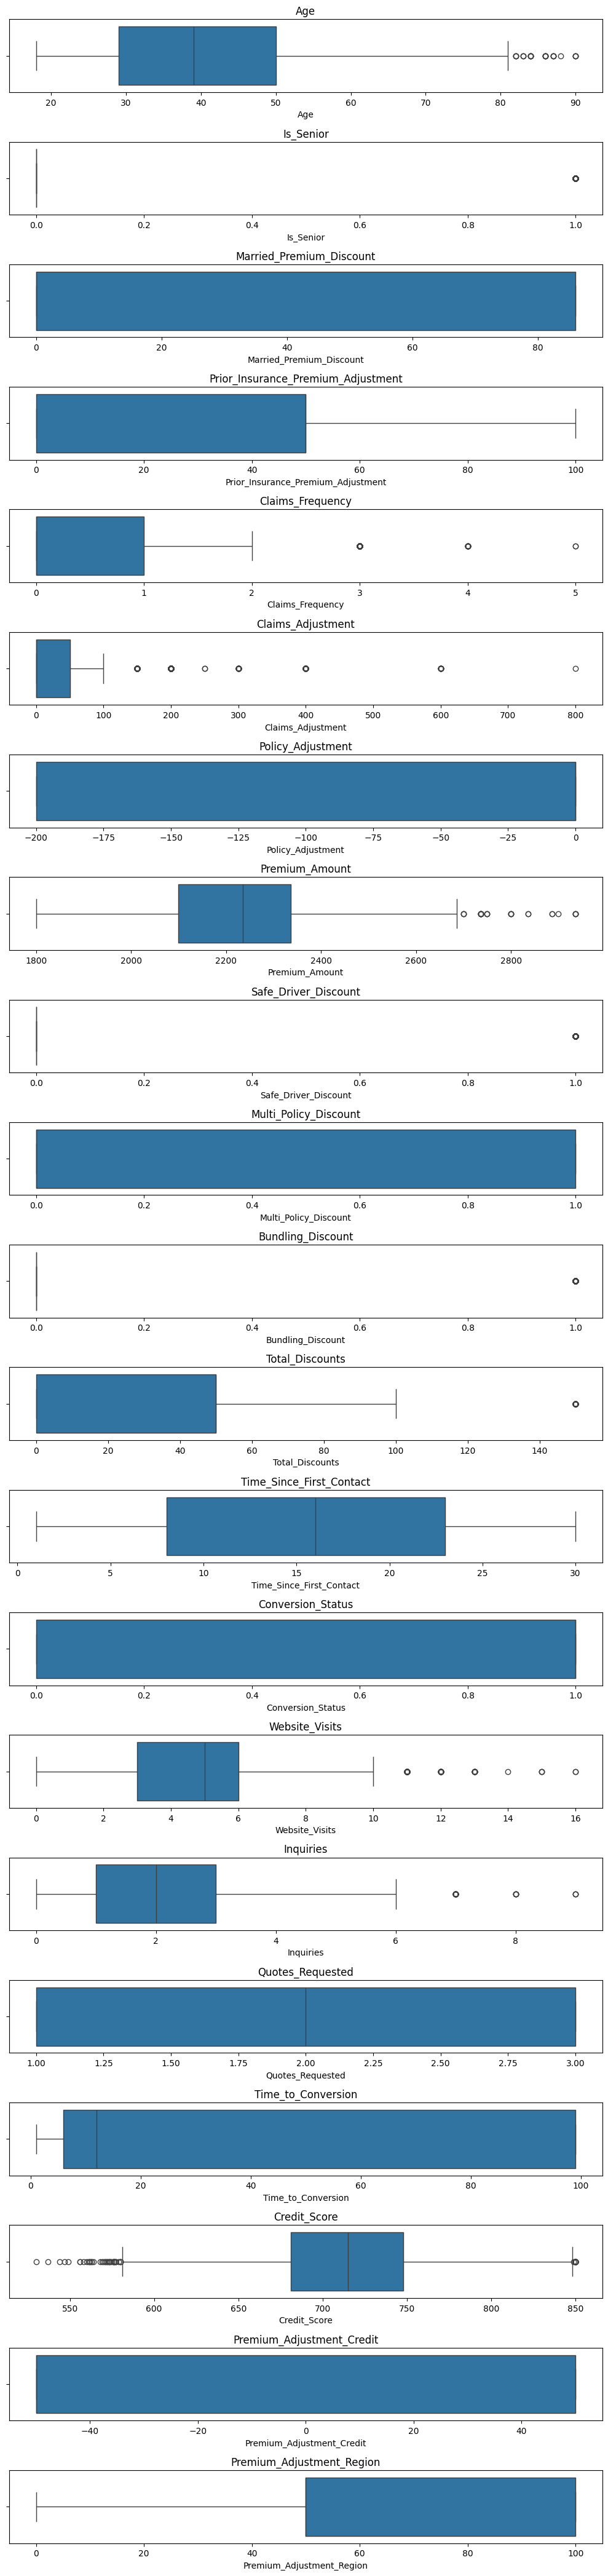

In [12]:
# Same as before, in order to comprehend the data I´m gonna make some boxplots

df_numeric = df.select_dtypes(include='number')

num_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generate individual boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [13]:
#

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#
for col in df.columns:
    #Por cada columna en el DataFrame
    if df[col].dtype == "object":  # Si la columna es categórica
        df[col] = df[col].fillna(df[col].mode()[0]) # Los valores nulos de la columna se llenan con la moda, osea el valor que más se repite.
    else: # En caso de que la columna sea de valores se va a llenar con la mediana.
        df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=np.number).columns:
    df = remove_outliers(df, col)

df.shape


(5562, 27)

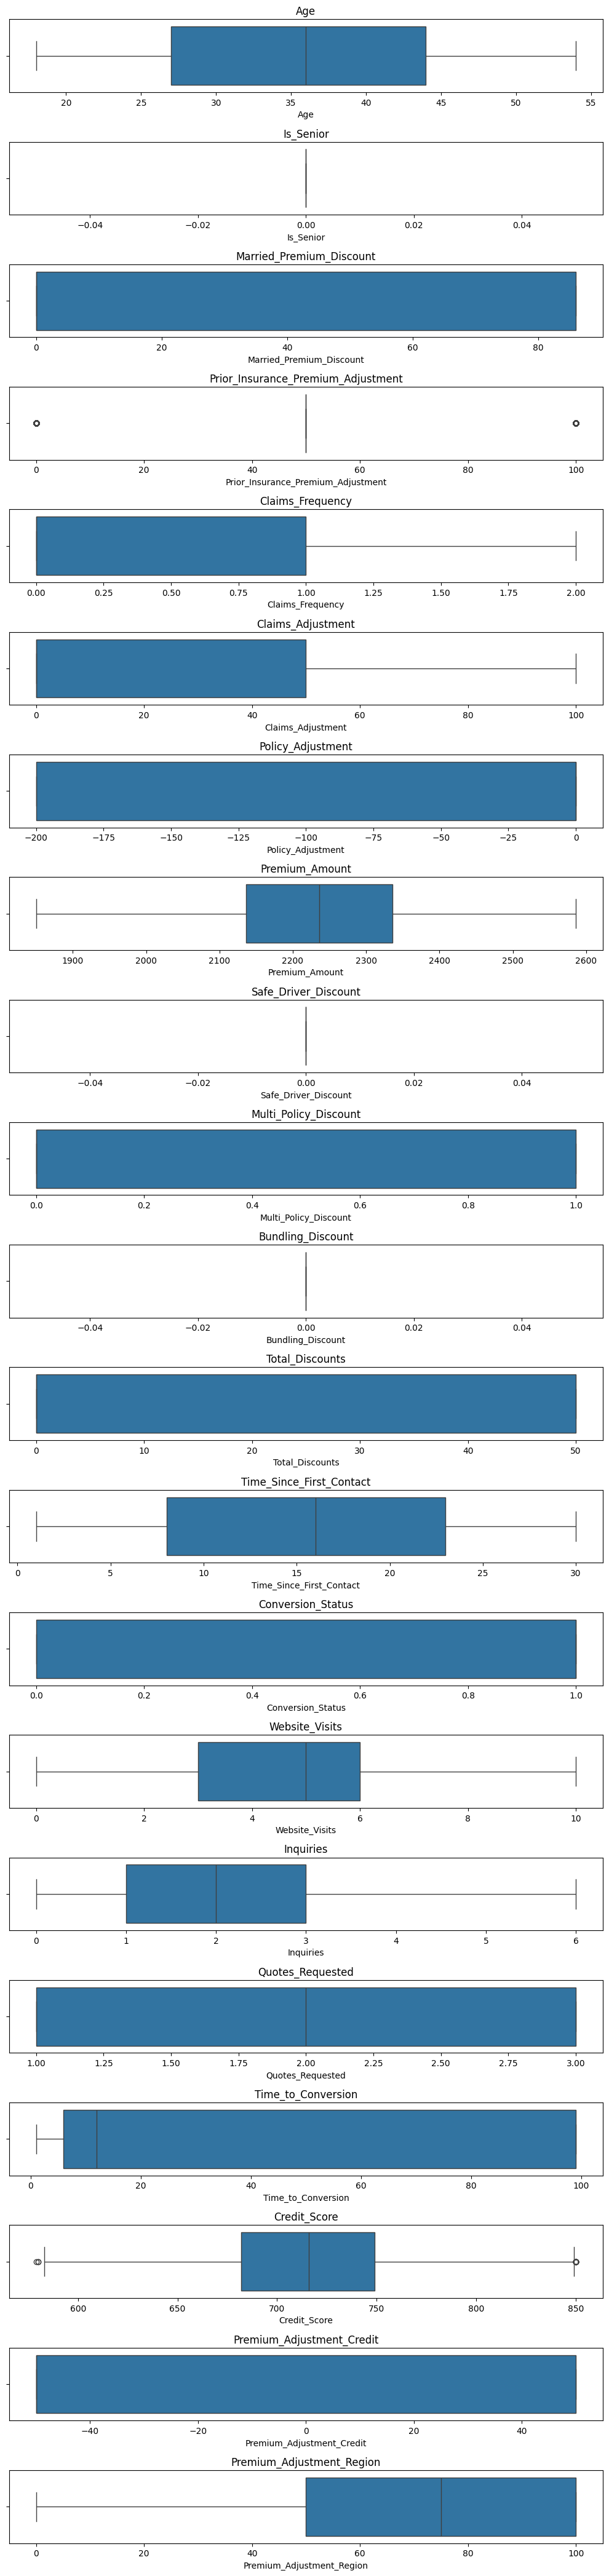

In [14]:
# Same as before, in order to comprehend the data I´m gonna make some boxplots

df_numeric = df.select_dtypes(include='number')

num_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generate individual boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [15]:
df_clean = df.copy()

In [16]:
pd.set_option('display.max_columns', None)
df_clean.head()

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,Policy_Adjustment,Premium_Amount,Safe_Driver_Discount,Multi_Policy_Discount,Bundling_Discount,Total_Discounts,Source_of_Lead,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,0,2286,0,0,0,0,Agent,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,0,2336,0,0,0,0,Online,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,0,2386,0,0,0,0,Online,28,0,4,4,1,99,772,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,0,2350,0,0,0,0,Agent,14,1,8,4,2,10,662,50,Suburban,50
7,51,0,Single,0,<1 year,100,0,Low,0,Full Coverage,0,2300,0,1,0,50,Online,1,0,3,0,2,99,639,50,Suburban,50


Ahora toca hacer el One-Hot para preparar los datos

Primero voy a identificar los datos ordinales y los datos categóricos (prior y claims severity)

In [17]:
df_clean.columns

Index(['Age', 'Is_Senior', 'Marital_Status', 'Married_Premium_Discount',
       'Prior_Insurance', 'Prior_Insurance_Premium_Adjustment',
       'Claims_Frequency', 'Claims_Severity', 'Claims_Adjustment',
       'Policy_Type', 'Policy_Adjustment', 'Premium_Amount',
       'Safe_Driver_Discount', 'Multi_Policy_Discount', 'Bundling_Discount',
       'Total_Discounts', 'Source_of_Lead', 'Time_Since_First_Contact',
       'Conversion_Status', 'Website_Visits', 'Inquiries', 'Quotes_Requested',
       'Time_to_Conversion', 'Credit_Score', 'Premium_Adjustment_Credit',
       'Region', 'Premium_Adjustment_Region'],
      dtype='object')

In [18]:
df_one_hot = pd.get_dummies(df_clean, columns=["Marital_Status", "Policy_Type", "Source_of_Lead", "Region"], drop_first=True, dtype=int)
df_one_hot

,Age,Is_Senior,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Adjustment,Premium_Amount,Safe_Driver_Discount,Multi_Policy_Discount,Bundling_Discount,Total_Discounts,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Premium_Adjustment_Region,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widowed,Policy_Type_Liability-Only,Source_of_Lead_Online,Source_of_Lead_Referral,Region_Suburban,Region_Urban
0,47,0,86,1-5 years,50,0,Low,0,0,2286,0,0,0,0,10,0,5,1,2,99,704,-50,50,1,0,0,0,0,0,1,0
1,37,0,86,1-5 years,50,0,Low,0,0,2336,0,0,0,0,22,0,5,1,2,99,726,-50,100,1,0,0,0,1,0,0,1
2,49,0,86,1-5 years,50,1,Low,50,0,2386,0,0,0,0,28,0,4,4,1,99,772,-50,100,1,0,0,0,1,0,0,1
4,36,0,0,>5 years,0,2,Low,100,0,2350,0,0,0,0,14,1,8,4,2,10,662,50,50,0,1,0,0,0,0,1,0
7,51,0,0,<1 year,100,0,Low,0,0,2300,0,1,0,50,1,0,3,0,2,99,639,50,50,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,18,0,0,1-5 years,50,0,Low,0,-200,2000,0,0,0,0,5,1,6,1,3,7,723,-50,50,0,1,0,1,1,0,1,0
9996,18,0,86,1-5 years,50,0,Medium,0,0,2436,0,0,0,0,3,1,6,1,3,6,667,50,100,1,0,0,0,0,0,0,1
9997,29,0,86,<1 year,100,0,Low,0,0,2486,0,0,0,0,29,1,3,4,3,3,637,50,100,1,0,0,0,0,0,0,1
9998,47,0,0,<1 year,100,0,Medium,0,-200,2150,0,0,0,0,8,1,2,4,1,13,676,50,50,0,1,0,1,0,0,1,0


In [19]:
df_one_hot["Prior_Insurance"] = df_one_hot["Prior_Insurance"].apply(lambda x: 0 if x == "<1 year" else 1 if x == "1-5 years" else 2 if x == ">5 years" else x)
df_one_hot["Prior_Insurance"]

0       1
1       1
2       1
4       2
7       0
       ..
9993    1
9996    1
9997    0
9998    0
9999    1
Name: Prior_Insurance, Length: 5562, dtype: int64

In [20]:
df_one_hot["Claims_Severity"] = df_one_hot["Claims_Severity"].apply(lambda x: 0 if x == "Low" else 1 if x == "Medium" else 2 if x == "High" else x)
df_one_hot["Claims_Severity"]

0       0
1       0
2       0
4       0
7       0
       ..
9993    0
9996    1
9997    0
9998    1
9999    2
Name: Claims_Severity, Length: 5562, dtype: int64

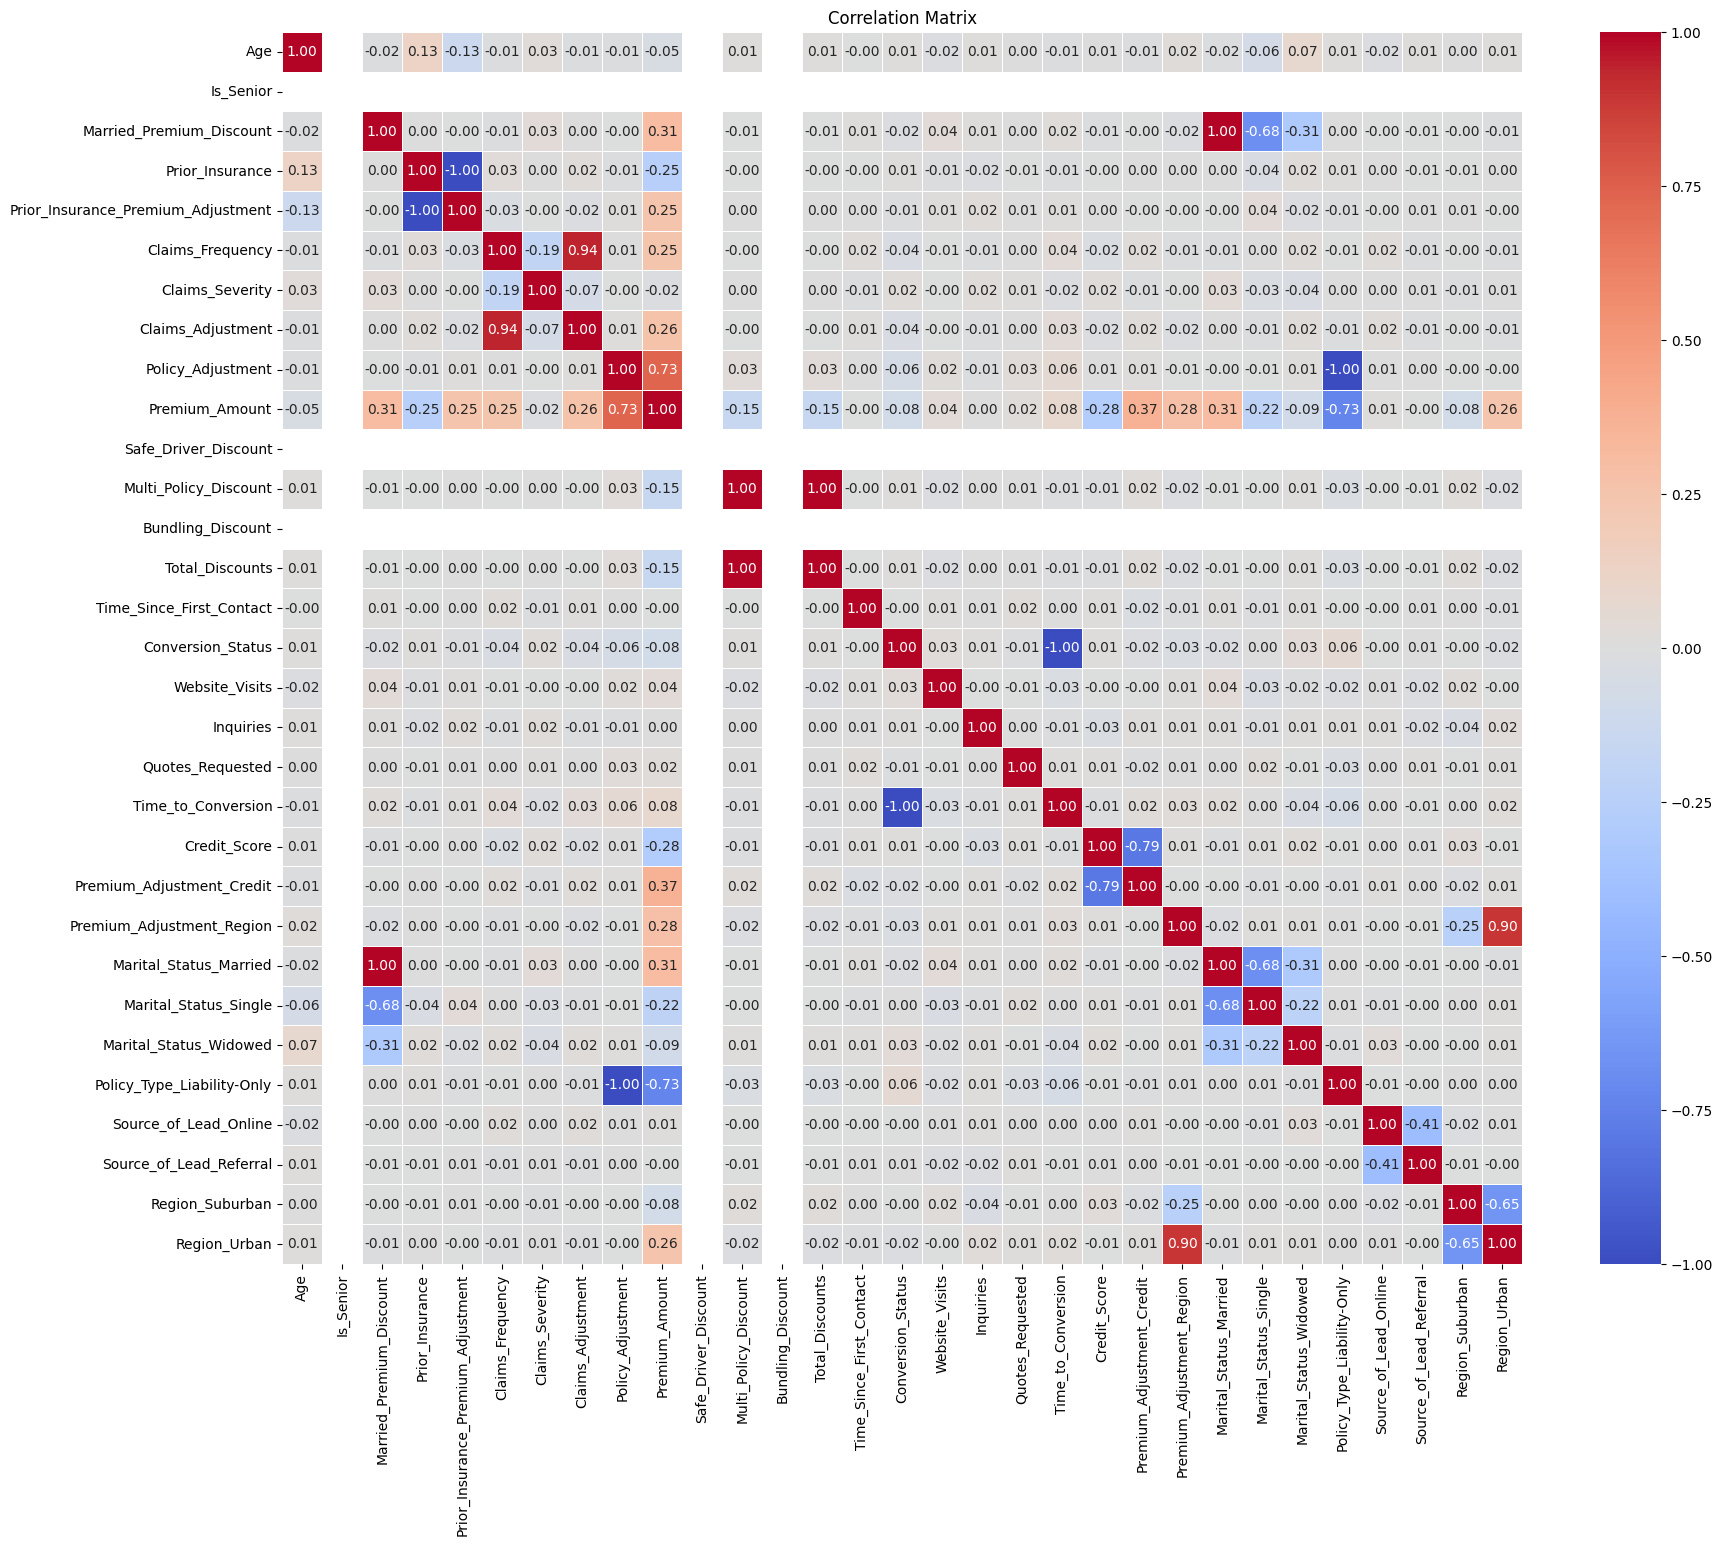

In [21]:

df_numeric = df_one_hot.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()

# Setting the size
plt.figure(figsize=(20,16))

# Creating a heatmap with Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

In [22]:
df_one_hot.describe()

,Age,Is_Senior,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Adjustment,Premium_Amount,Safe_Driver_Discount,Multi_Policy_Discount,Bundling_Discount,Total_Discounts,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Premium_Adjustment_Region,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widowed,Policy_Type_Liability-Only,Source_of_Lead_Online,Source_of_Lead_Referral,Region_Suburban,Region_Urban
count,5562.000000,5562.0,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.0,5562.000000,5562.0,5562.000000,5562.000000,5562.000000,5562.00000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000
mean,35.683927,0.0,41.809421,1.028407,48.579648,0.403092,0.320928,23.157138,-79.755484,2221.807623,0.0,0.307084,0.0,15.354189,15.541352,0.574973,4.94858,1.978785,1.992449,46.186264,715.554297,-11.488673,64.859763,0.486156,0.330816,0.090795,0.398777,0.604998,0.098526,0.297195,0.500000
std,10.652328,0.0,42.987379,0.682917,34.145829,0.603035,0.589750,35.064512,97.938165,134.943993,0.0,0.461326,0.0,23.066296,8.691593,0.494392,2.10843,1.384756,0.814771,45.512512,49.509695,48.666582,39.197903,0.499853,0.470549,0.287343,0.489691,0.488895,0.298051,0.457064,0.500045
min,18.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,1850.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,579.000000,-50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.0,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,-200.000000,2136.000000,0.0,0.000000,0.0,0.000000,8.000000,0.000000,3.00000,1.000000,1.000000,6.000000,682.000000,-50.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.0,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,2236.000000,0.0,0.000000,0.0,0.000000,16.000000,1.000000,5.00000,2.000000,2.000000,12.000000,716.000000,-50.000000,75.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000
75%,44.000000,0.0,86.000000,1.000000,50.000000,1.000000,1.000000,50.000000,0.000000,2336.000000,0.0,1.000000,0.0,50.000000,23.000000,1.000000,6.00000,3.000000,3.000000,99.000000,749.000000,50.000000,100.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,54.000000,0.0,86.000000,2.000000,100.000000,2.000000,2.000000,100.000000,0.000000,2586.000000,0.0,1.000000,0.0,50.000000,30.000000,1.000000,10.00000,6.000000,3.000000,99.000000,850.000000,50.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


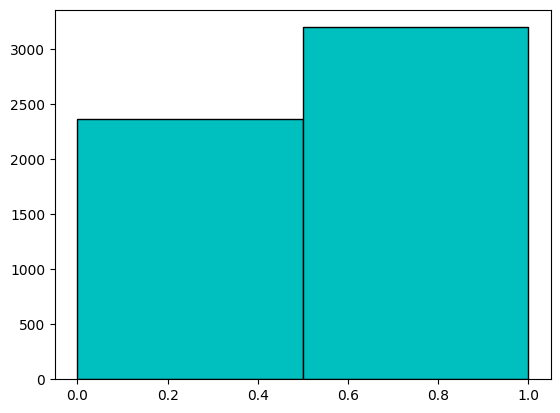

In [23]:
plt.hist(df_one_hot["Conversion_Status"], bins=2, color="c", edgecolor="black")
plt.show()

Importar librerías para el modelo

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [25]:
X = df_one_hot.drop("Conversion_Status", axis=1)
y = df_one_hot["Conversion_Status"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [27]:
model = XGBRegressor()

In [28]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [29]:
model.score(X_test, y_test)

1.0

In [30]:
predictions = model.predict(X_test)

In [31]:
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

R-squared: 1.0


In [32]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 1.2496989554300342e-10
RMSE: 1.1178993494183787e-05


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

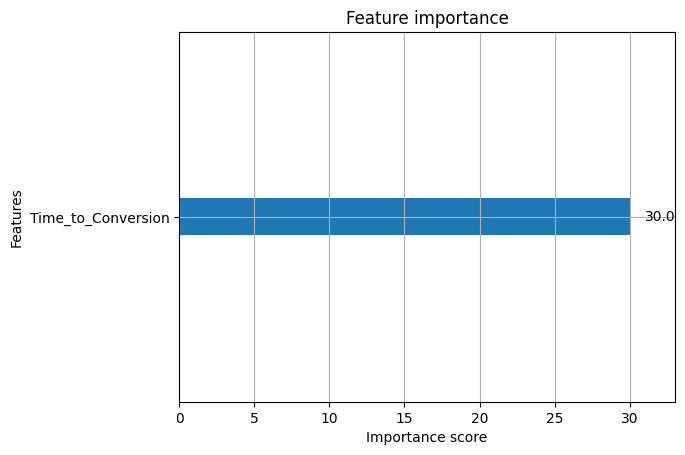

In [33]:
import xgboost as xgb
xgb.plot_importance(model, ax=plt.gca())

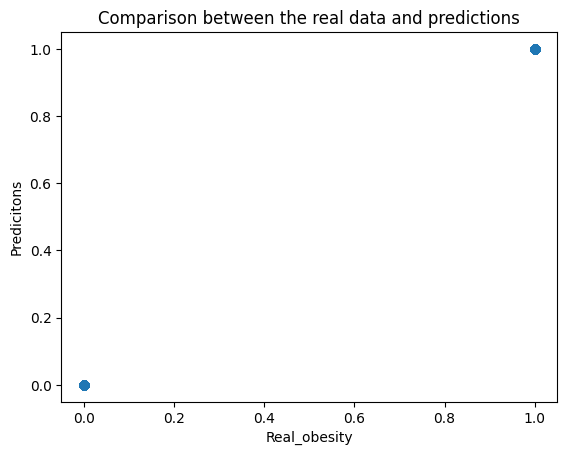

In [34]:
# Gráfico de dispersión
plt.scatter(y_test, predictions)
plt.xlabel('Real_obesity')
plt.ylabel('Predicitons')
plt.title('Comparison between the real data and predictions')
plt.show()

# Kmeans

Region, "Claims severity: {Low : 1, Medium : 2, High : 3}" * "Claims frequency" as the y variable

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [36]:
df_clean.head()


,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,Policy_Adjustment,Premium_Amount,Safe_Driver_Discount,Multi_Policy_Discount,Bundling_Discount,Total_Discounts,Source_of_Lead,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,0,2286,0,0,0,0,Agent,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,0,2336,0,0,0,0,Online,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,0,2386,0,0,0,0,Online,28,0,4,4,1,99,772,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,0,2350,0,0,0,0,Agent,14,1,8,4,2,10,662,50,Suburban,50
7,51,0,Single,0,<1 year,100,0,Low,0,Full Coverage,0,2300,0,1,0,50,Online,1,0,3,0,2,99,639,50,Suburban,50


In [37]:
df_kmeans = df_clean.copy()

In [38]:
df_kmeans["Claims_Severity"] = df_kmeans["Claims_Severity"].apply(lambda x: 0 if x == "Low" else 1 if x == "Medium" else 2 if x == "High" else x)
df_kmeans["Claims_Severity"]

0       0
1       0
2       0
4       0
7       0
       ..
9993    0
9996    1
9997    0
9998    1
9999    2
Name: Claims_Severity, Length: 5562, dtype: int64

In [39]:
df_kmeans["Region"] = df_kmeans["Region"].apply(lambda x: 0 if x == "Rural" else 1 if x == "Suburban" else 2 if x == "Urban" else x)
df_kmeans["Region"]

0       1
1       2
2       2
4       1
7       1
       ..
9993    1
9996    2
9997    2
9998    1
9999    1
Name: Region, Length: 5562, dtype: int64

In [40]:
# input matrix for segmentation
x = df_kmeans[["Claims_Frequency", "Claims_Severity", "Region"]].values

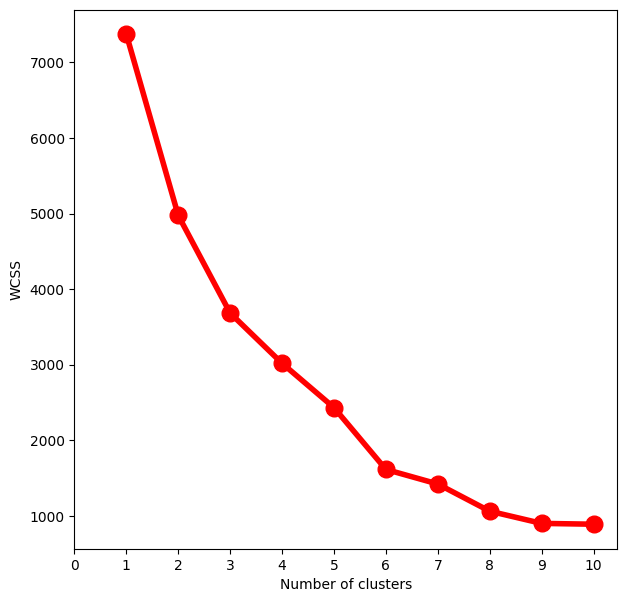

In [41]:
WCSS = []
for i in range(1,11):
    k_model = KMeans(n_clusters = i,init = 'k-means++')
    k_model.fit(x)
    WCSS.append(k_model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [42]:
# finding the clusters based on input matrix "x"
k_model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = k_model.fit_predict(x)

In [43]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Claims_Frequency'),yaxis = dict(title  = 'Region'),zaxis = dict(title  = 'Claims_Severity'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = k_model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()